In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:

# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movies = pd.read_csv("Movie+Assignment+Data.csv")
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe

movies.shape

(100, 62)

In [5]:
# Check the column-wise info of the dataframe

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [6]:
# Check the summary for the numeric columns 

movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


In [7]:
# Cheaking the null value in 'movies' dataframe 

pd.set_option('display.max_rows', 100)
movies.isnull().sum()

Title                      0
title_year                 0
budget                     0
Gross                      0
actor_1_name               0
actor_2_name               0
actor_3_name               0
actor_1_facebook_likes     0
actor_2_facebook_likes     1
actor_3_facebook_likes     2
IMDb_rating                0
genre_1                    0
genre_2                    3
genre_3                   26
MetaCritic                 5
Runtime                    0
CVotes10                   0
CVotes09                   0
CVotes08                   0
CVotes07                   0
CVotes06                   0
CVotes05                   0
CVotes04                   0
CVotes03                   0
CVotes02                   0
CVotes01                   0
CVotesMale                 0
CVotesFemale               0
CVotesU18                  0
CVotesU18M                 0
CVotesU18F                 0
CVotes1829                 0
CVotes1829M                0
CVotes1829F                0
CVotes3044    

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [8]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies['budget'] = movies.budget/1000000
movies['Gross'] = movies.Gross/1000000
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [9]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies['profit'] = movies['Gross'] - movies['budget']
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371


In [10]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

movies.sort_values(by = 'profit', ascending = False, inplace = True)
movies.reset_index(drop=True, inplace=True)

# Selecting only those columns which shows required information for better understanding

movies[['Title', 'budget', 'Gross', 'profit']]

,Title,budget,Gross,profit
0,Star Wars: Episode VII - The Force Awakens,245.0,936.662225,691.662225
1,The Avengers,220.0,623.279547,403.279547
2,Deadpool,58.0,363.024263,305.024263
3,The Hunger Games: Catching Fire,130.0,424.645577,294.645577
4,Toy Story 3,200.0,414.984497,214.984497
5,The Dark Knight Rises,250.0,448.130642,198.130642
6,The Lego Movie,60.0,257.756197,197.756197
7,Zootopia,150.0,341.268248,191.268248
8,Despicable Me,69.0,251.501645,182.501645
9,Inside Out,175.0,356.454367,181.454367


In [11]:
# Checking the shape of 'movies' dataframe

movies.shape

(100, 63)

In [12]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
# Store them in a new dataframe 'top10'

top10 = movies.iloc[0:10]
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
1,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
2,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
3,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
4,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
5,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
6,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
7,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
8,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
9,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


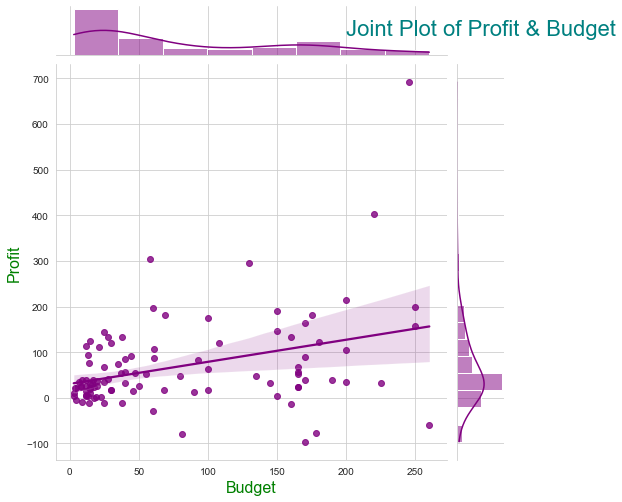

In [13]:
# Setting Style 
sns.set_style('whitegrid')

# Plot profit vs budget
profit_budget_graph = sns.jointplot(movies.budget, movies.profit, height = 7, ratio = 7, kind = 'reg', color = 'Purple')

# Setting title 
plt.title("Joint Plot of Profit & Budget\n", fontdict = {'fontsize' : 22, 'fontweight' : 7, 'color' : 'Teal'})

# Setting lable for x axis and y axis
profit_budget_graph.set_axis_labels("Budget", "Profit", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})

plt.show()

- Inference: 
-            There is only tow movies with very high budget have very high profit.
             
-            Other than that movies with high budget does not seem to be highly profitable.
             
-            Most of the movies lies under 100mn of budget and genrated profit between 100mn to 200mn or lesser.
             
-            And movies with more than 100mn budget also seem to have profit between 100mn to 200mn or even lesser as same as                lower budget movies. 
             
-            There is a slight positive trend between budget and profit.

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [14]:
# Find the movies with negative profit and storing them in a new dataframe 'neg_profit' 

neg_profit = movies[movies['profit'] < 0]
neg_profit.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
89,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
90,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
91,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
92,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
93,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786


In [15]:
# Sorting in ascending order of 'profit'

neg_profit.sort_values(by = 'profit', ascending = True, inplace = True)
neg_profit.reset_index(drop = True, inplace = True)

# Selecting only those columns which shows required information for better understanding

neg_profit[['Title', 'budget', 'Gross', 'profit']]

,Title,budget,Gross,profit
0,Hugo,170.0,73.820094,-96.179906
1,The Little Prince,81.2,1.339152,-79.860848
2,Edge of Tomorrow,178.0,100.189501,-77.810499
3,Tangled,260.0,200.807262,-59.192738
4,Scott Pilgrim vs. the World,60.0,31.494270,-28.505730
5,X-Men: First Class,160.0,146.405371,-13.594629
6,Flipped,14.0,1.752214,-12.247786
7,Warrior,25.0,13.651662,-11.348338
8,Rush,38.0,26.903709,-11.096291
9,Amour,8.9,0.225377,-8.674623


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

In [16]:
# Checking the shape of 'neg_profit' dataframe

neg_profit.shape

(11, 63)

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [17]:
# Cheaking if there is any null value present in 'MetaCritic' column 

movies['MetaCritic'].isnull().sum()

5

In [18]:
# Replacing all the null values of 'MetaCritic' column

movies['MetaCritic'] = movies['MetaCritic'].fillna(0)
movies['MetaCritic'].isnull().sum()

0

In [19]:
# Change the scale of 'MetaCritic'

movies['MetaCritic'] = movies['MetaCritic']/10
movies['MetaCritic']

0      8.1
1      6.9
2      6.5
3      7.6
4      9.2
5      7.8
6      8.3
7      7.8
8      7.2
9      9.4
10     9.6
11     7.6
12     7.5
13     6.5
14     6.2
15     8.0
16     7.2
17     7.4
18     8.8
19     0.0
20     9.3
21     8.0
22     6.9
23     8.1
24     7.9
25     8.1
26     7.9
27     8.6
28     7.0
29     6.3
30     0.0
31     6.8
32     7.3
33     8.2
34     7.9
35     7.2
36     8.1
37     7.4
38     9.5
39     7.4
40     8.1
41     7.4
42     8.3
43     7.6
44     6.3
45     8.1
46     8.1
47     6.9
48     7.2
49     9.6
50     7.9
51     9.6
52     8.8
53     6.8
54     7.4
55     6.6
56     8.1
57     7.6
58     8.9
59     8.4
60     7.2
61     7.7
62     8.7
63     9.3
64     7.2
65     8.8
66     7.6
67     7.4
68     8.4
69    10.0
70     7.2
71     7.8
72     6.6
73     6.4
74     8.2
75     7.5
76     8.8
77     7.4
78     7.1
79     7.8
80     8.8
81     8.6
82     9.4
83     6.7
84     9.0
85     0.0
86     9.0
87     0.0
88     8.2
89     6.5
90     9.4

In [20]:
# Find the average ratings
# Create a new column 'Avg_rating' which will have the average of the 'MetaCritic' and 'Rating' columns

movies['Avg_rating'] = (movies['MetaCritic'] + movies['IMDb_rating'])/2 
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
1,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.50
2,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
3,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
4,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75


In [21]:
# Sort in descending order of average rating

movies.sort_values(by = 'Avg_rating', ascending = False, inplace = True)
movies.reset_index(drop = True, inplace = True)

# Selecting only those columns which shows required information for better understanding

movies[['Title', 'IMDb_rating', 'MetaCritic', 'Avg_rating']]

,Title,IMDb_rating,MetaCritic,Avg_rating
0,Boyhood,7.9,10.0,8.95
1,12 Years a Slave,8.1,9.6,8.85
2,Inside Out,8.2,9.4,8.80
3,La La Land,8.2,9.3,8.75
4,Manchester by the Sea,7.9,9.6,8.75
5,Toy Story 3,8.3,9.2,8.75
6,Gravity,7.8,9.6,8.70
7,Spotlight,8.1,9.3,8.70
8,Whiplash,8.5,8.8,8.65
9,Amour,7.9,9.4,8.65


In [22]:
# Checking the shape of 'movies' dataframe

movies.shape

(100, 64)

In [23]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)
# Storing them in a new dataframe 'UniversalAcclaim'

UniversalAcclaim = movies[(abs(movies['IMDb_rating'] - movies['MetaCritic']) < 0.5) & (movies['Avg_rating'] >= 8)]

# Sorting in descending order of 'Avg_rating'

UniversalAcclaim.sort_values(by = 'Avg_rating', ascending = False)
UniversalAcclaim.reset_index(drop = True, inplace = True)

In [24]:
# Selecting only those columns which shows required information for better understanding

UniversalAcclaim[['Title', 'IMDb_rating', 'MetaCritic', 'Avg_rating']]

,Title,IMDb_rating,MetaCritic,Avg_rating
0,Whiplash,8.5,8.8,8.65
1,Django Unchained,8.4,8.1,8.25
2,Dallas Buyers Club,8.0,8.4,8.20
3,Star Wars: Episode VII - The Force Awakens,8.1,8.1,8.10
4,Arrival,8.0,8.1,8.05
5,Gone Girl,8.1,7.9,8.00
6,The Martian,8.0,8.0,8.00


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

In [25]:
# Checking the shape of 'UniversalAcclaim' dataframe

UniversalAcclaim.shape

(7, 64)

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [26]:
# Cheaking if there is any null value present in 'actor_1_facebook_likes' column 

movies['actor_1_facebook_likes'].isnull().sum()

0

In [27]:
# Cheaking if there is any null value prresent in 'actor_2_facebook_likes' column 

movies['actor_2_facebook_likes'].isnull().sum()

1

In [28]:
# Replacing the null values of 'actor_2_facebook_likes' column

movies['actor_2_facebook_likes'] = movies['actor_2_facebook_likes'].fillna(0)
movies['actor_2_facebook_likes'].isnull().sum()

0

In [29]:
# Cheaking if there is any null value present in 'actor_3_facebook_likes' column 

movies['actor_3_facebook_likes'].isnull().sum()

2

In [30]:
# Replacing all the null values of 'actor_3_facebook_likes' column

movies['actor_3_facebook_likes'] = movies['actor_3_facebook_likes'].fillna(0)
movies['actor_3_facebook_likes'].isnull().sum()

0

In [31]:
# Write your code here
# Adding a new column 'Total_Facebook_Likes' which is the sum of columns 'actor_1_facebook_likes', 'actor_2_facebook_likes' 
# and 'actor_3_facebook_likes'

movies['Total_Facebook_Likes'] = movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Total_Facebook_Likes
0,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.2,8.0,7.9,R,USA,21.359200,8.95,550.0
1,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85,3160.0
2,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.80,2151.0
3,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,0.0,...,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75,33000.0
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0


In [32]:
# Sorting in descending order of 'Total_Facebook_Likes'

movies.sort_values(by = 'Total_Facebook_Likes', ascending = False, inplace = True)
movies.reset_index(drop = True, inplace = True)

# Selecting only those columns which shows required information for better understanding

movies.head(5)[['Title','actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 'Total_Facebook_Likes']]

,Title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total_Facebook_Likes
0,Lion,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Inception,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,X-Men: Days of Future Past,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Manchester by the Sea,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


In [33]:
# Top 5 popular trios, and output their names in a list.

top_5_popular_trios = movies.head(5)[['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()
top_5_popular_trios

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

In [34]:
# Checking the shape of 'movies' dataframe

movies.shape

(100, 65)

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above? Write your answers in the markdown cell provided below.

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** (3 trios - ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'], 
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'], ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']) 

- **`Most popular trio after applying the condition:`** (['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'] with 79000   Total_Facebook_Likes)

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [35]:
# Your answer here (optional and not graded)



- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

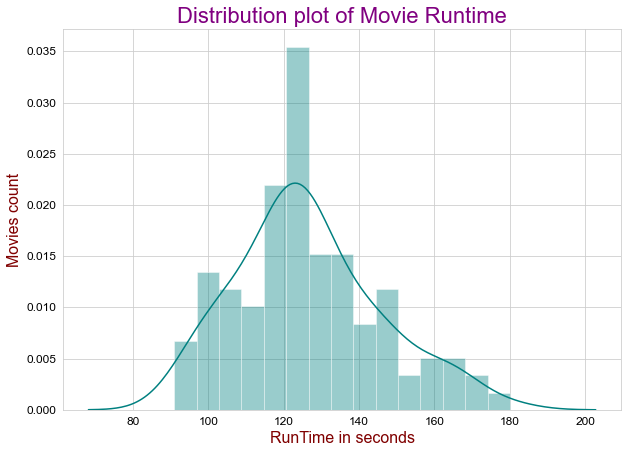

In [36]:
# Runtime histogram/density plot

plt.figure(figsize = [10,7])

runtime_distplot = sns.distplot(movies.Runtime, bins = 15, color = 'Teal')

# Setting title
plt.title('Distribution plot of Movie Runtime', fontsize = 22, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
runtime_distplot.set_xlabel("RunTime in seconds", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
runtime_distplot.set_ylabel("Movies count", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

# Setting x & y ticks
plt.xticks(fontsize = 12, fontweight = 5, color = 'Black')
plt.yticks(fontsize = 12, fontweight = 5, color = 'Black')

plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [37]:
# Checking the values of 'content_rating' column of 'movies' dataframe

movies['content_rating'].value_counts()

PG-13    45
R        42
PG       12
G         1
Name: content_rating, dtype: int64

In [38]:
# Write your code here
# Select movies that have the highest number of votes i.e.'CVotesU18' from the 'movies' dataframe 
# Store them in a new dataframe 'PopularR'

PopularR = movies[movies['content_rating'] == 'R'].sort_values(by = 'CVotesU18', ascending = False)
PopularR.reset_index(drop = True, inplace = True)
PopularR.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Total_Facebook_Likes
0,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,17166.0
1,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85,44000.0
2,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,40265.0
3,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55,36943.0
4,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0


In [39]:
# Top 10 movies that have the highest number of votes i.e. CVotesU18

PopularR[['Title', 'CVotesU18']].head(10)

,Title,CVotesU18
0,Deadpool,4598
1,The Wolf of Wall Street,3622
2,Django Unchained,3250
3,Mad Max: Fury Road,3159
4,Whiplash,2878
5,The Revenant,2619
6,Shutter Island,2321
7,Gone Girl,2286
8,The Grand Budapest Hotel,2083
9,Birdman or (The Unexpected Virtue of Ignorance),1891


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

In [40]:
# Checking the shape of 'PopularR' dataframe

PopularR.shape

(42, 65)

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [41]:
# Create the dataframe 'df_by_genre'

df_by_genre = movies.iloc[:, 11:60]
df_by_genre = df_by_genre.drop(columns = ['MetaCritic', 'Runtime'])
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
1,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8
2,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9
3,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8
4,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,...,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4


In [42]:
# Create a column 'cnt' and initialize it to 1

df_by_genre['cnt'] = 1
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
1,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,1
2,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,1
3,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1
4,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,...,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,1


In [43]:
# Checking the shape of 'df_by_genre' dataframe

df_by_genre.shape

(100, 48)

In [44]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby(by = 'genre_1').sum()
df_by_g2 = df_by_genre.groupby(by = 'genre_2').sum()
df_by_g3 = df_by_genre.groupby(by = 'genre_3').sum()

In [45]:
# Add the grouped data frames and store it in a new dataframe 'df_add'

df_add = df_by_g1.add(df_by_g2, fill_value = 0).add(df_by_g3, fill_value = 0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [46]:
# Extract genres with atleast 10 occurences and store them in a new dataframe 'genre_top10'

genre_top10 = df_add[df_add['cnt'] >= 10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [47]:
# Take the mean for every column by dividing with cnt 

genre_top10 = pd.concat([genre_top10.iloc[:,0:44].div(genre_top10.cnt, axis = 0), genre_top10.cnt], axis = 1)
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0


In [48]:
# Rounding off the columns of Votes to two decimals

genre_top10.iloc[:,27:].round(2)

,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,7.96,7.96,8.29,8.29,8.33,8.11,8.11,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,7.87,7.82,8.21,8.21,8.07,8.01,8.02,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


In [49]:
# Converting CVotes to int type

genre_top10.iloc[:,0:27].astype('int')

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,36996,155623,132836,20627,28862,24092,4269,681,69190,225998
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,39896,138490,115795,20750,26641,21910,4267,662,61734,208034
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,39314,94853,75824,17751,16305,12966,3063,578,47673,150424
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,29157,111073,92158,17354,22550,18039,4126,600,45389,171004
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,37509,106680,86346,18841,19954,15979,3621,605,49220,165869
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,28310,121645,102671,17292,22867,18799,3658,620,49928,181338
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,29896,106122,87644,16964,21612,17422,3806,585,44164,161234
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,37926,80768,62253,17350,15719,12054,3381,548,37141,131254
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,45269,188483,160141,25620,36127,30141,5340,714,80695,272068
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,36989,153475,129421,21922,29590,24421,4654,669,63361,228944


In [50]:
# Concatinating the both round off values of 'Votes' & converted values of 'CVotes' colums

genre_top10 = pd.concat([genre_top10.iloc[:,0:27].astype('int'), genre_top10.iloc[:,27:].round(2)], axis = 1)
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


In [51]:
# Checking the shape of 'genre_top10' dataframe

genre_top10.shape

(10, 45)

In [52]:
# Checking the data type of 'genre_top10'

genre_top10.dtypes

CVotes10          int32
CVotes09          int32
CVotes08          int32
CVotes07          int32
CVotes06          int32
CVotes05          int32
CVotes04          int32
CVotes03          int32
CVotes02          int32
CVotes01          int32
CVotesMale        int32
CVotesFemale      int32
CVotesU18         int32
CVotesU18M        int32
CVotesU18F        int32
CVotes1829        int32
CVotes1829M       int32
CVotes1829F       int32
CVotes3044        int32
CVotes3044M       int32
CVotes3044F       int32
CVotes45A         int32
CVotes45AM        int32
CVotes45AF        int32
CVotes1000        int32
CVotesUS          int32
CVotesnUS         int32
VotesM          float64
VotesF          float64
VotesU18        float64
VotesU18M       float64
VotesU18F       float64
Votes1829       float64
Votes1829M      float64
Votes1829F      float64
Votes3044       float64
Votes3044M      float64
Votes3044F      float64
Votes45A        float64
Votes45AM       float64
Votes45AF       float64
Votes1000       

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

In [53]:
# Setting index to column 'Genre' of dataframe 'genre_top10' 

genre_top10 = genre_top10.reset_index()
genre_top10 = genre_top10.rename(columns = {'index' : 'Genre'})
genre_top10.head()

,Genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


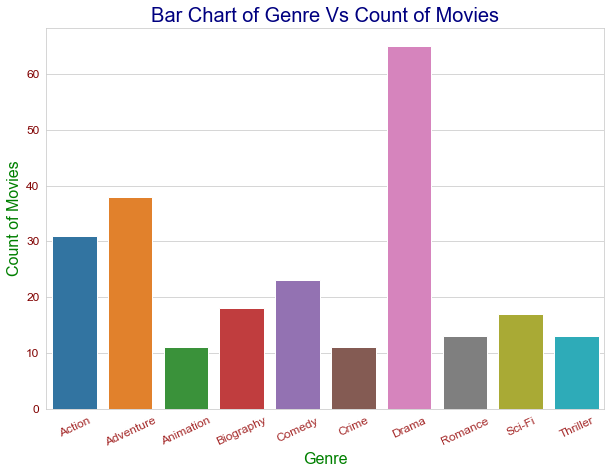

In [54]:
# Countplot for genres

plt.figure(figsize = [10,7])

graph_genre_Vs_cnt = sns.barplot(data = genre_top10, x = 'Genre', y = 'cnt')

# Setting title
plt.title('Bar Chart of Genre Vs Count of Movies', fontsize = 20, fontweight = 7, color = 'Navy')

#S etting lable for x axis and y axis
graph_genre_Vs_cnt.set_xlabel("Genre", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
graph_genre_Vs_cnt.set_ylabel("Count of Movies", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})

# Setting x & y ticks
plt.xticks(rotation = 25, fontsize = 12, fontweight = 5, color = 'Brown')
plt.yticks(fontsize = 12, fontweight = 5, color = 'Maroon')

plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [55]:
# Setting index of dataframe 'genre_top10' 

genre_top10 = genre_top10.set_index('Genre')
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Genre,,,,,,,,,,,,,,,,,,,,,
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


In [56]:
# Creating a seperate dataframe 'Avg_Males_CVotes' for heatmap by using pivot table function
# which contains the average of 'Cvotes' of males of diffrent age groups

Avg_Males_CVotes = genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['CVotesU18M', 'CVotes1829M', 'CVotes3044M', 
                                                                                     'CVotes45AM']]
Avg_Males_CVotes

,CVotesU18M,CVotes1829M,CVotes3044M,CVotes45AM
Genre,,,,
Action,1916,164703,132836,24092
Adventure,1900,146808,115795,21910
Animation,1486,103695,75824,12966
Biography,886,114043,92158,18039
Comedy,1178,109016,86346,15979
Crime,932,122690,102671,18799
Drama,915,105203,87644,17422
Romance,535,79024,62253,12054
Sci-Fi,2382,197123,160141,30141


In [57]:
# Creating a seperate dataframe 'Avg_Females_CVotes' for heatmap by using pivot table function
# which contains the average of 'Cvotes' of females of diffrent age groups

Avg_Females_CVotes = genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['CVotesU18F', 'CVotes1829F', 
                                                                                       'CVotes3044F', 'CVotes45AF']]
Avg_Females_CVotes

,CVotesU18F,CVotes1829F,CVotes3044F,CVotes45AF
Genre,,,,
Action,525,36996,20627,4269
Adventure,601,39896,20750,4267
Animation,664,39314,17751,3063
Biography,265,29157,17354,4126
Comedy,459,37509,18841,3621
Crime,227,28310,17292,3658
Drama,317,29896,16964,3806
Romance,474,37926,17350,3381
Sci-Fi,613,45269,25620,5340


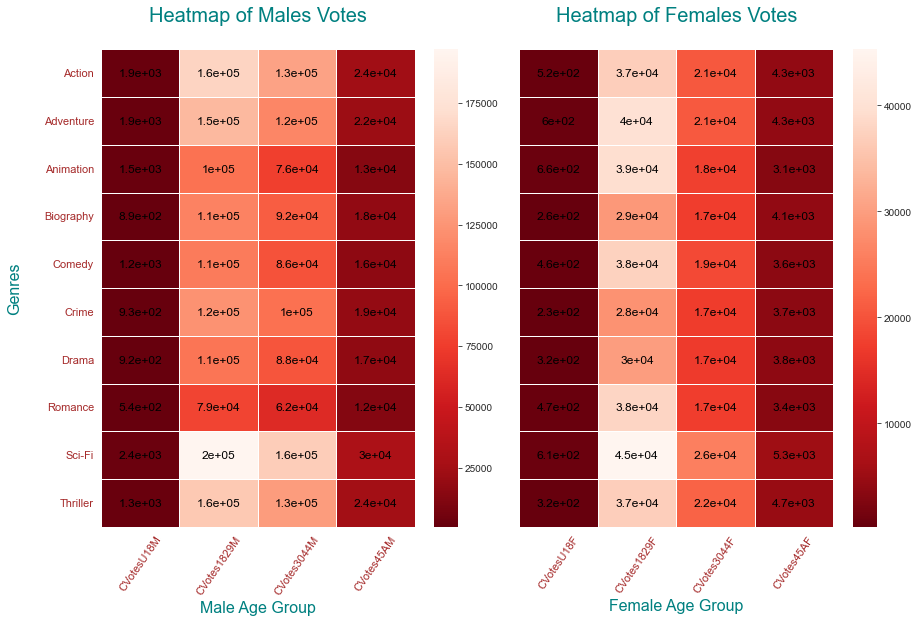

In [58]:
# 1st set of heat maps for CVotes-related columns

# Setting subplot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (13,9))

# Setting heatmap for Avg_Males_Votes
M_CVotes = sns.heatmap(Avg_Males_CVotes, cmap = 'Reds_r', ax = ax1, annot = True, 
                       annot_kws = {'fontsize' : 12, 'fontweight' : 6, 'color' : 'Black'}, linewidths = 0.5)

# Setting title
M_CVotes.set_title('Heatmap of Males Votes\n', fontsize = 20, fontweight = 6, color = 'Teal')

# Setting x and y axis lable
M_CVotes.set_xlabel('Male Age Group\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Teal'})
M_CVotes.set_ylabel('Genres\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Teal'})

# Setting x & y ticks
M_CVotes.set_xticklabels(M_CVotes.get_xticklabels(), rotation = 55, fontsize = 11, fontweight = 5, color = 'Brown')
M_CVotes.set_yticklabels(M_CVotes.get_yticklabels(), rotation = 0, fontsize = 11, fontweight = 5, color = 'Brown')

# Setting heatmap for Avg_Females_Votes
F_CVotes = sns.heatmap(Avg_Females_CVotes, cmap = 'Reds_r', ax = ax2, annot = True, 
                       annot_kws = {'fontsize' : 12, 'fontweight' : 6, 'color' : 'Black'}, linewidths = 0.5)

# Setting title
F_CVotes.set_title('Heatmap of Females Votes\n', fontsize = 20, fontweight = 6, color = 'Teal')

# Setting x and y axis lable
F_CVotes.set_xlabel('Female Age Group\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Teal'})
F_CVotes.set_ylabel('')

# Setting x ticks
F_CVotes.set_xticklabels(F_CVotes.get_xticklabels(), rotation = 55, fontsize = 11, fontweight = 5, color = 'Brown')


plt.tight_layout()
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Audience from age group of U18 & 45A both male and female are least likely to cast votes whereas audience from                  age group of 18-29 and 30-44 both male and female are the most likely to cast votes.   
- Inference 2: Other than Sci-Fi, Thriller and Action are the most voted genre among the 18-29 age group irrespective of their                gender.
- Inference 3: Romance is the least voted by the males of all age group whereas it is one of the most voted genre among the                    18-29 female age group. And Crime is the least voted by the females of all age group. 

In [59]:
# Creating a seperate dataframe 'Avg_M_Votes' for heatmap by using pivot table function
# which contains the average of 'Votes' of males of diffrent age groups

Avg_M_Votes = genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['VotesU18M', 'Votes1829M', 'Votes3044M', 
                                                                                'Votes45AM']]
Avg_M_Votes

,VotesU18M,Votes1829M,Votes3044M,Votes45AM
Genre,,,,
Action,8.15,7.98,7.73,7.63
Adventure,8.14,8.01,7.73,7.64
Animation,7.97,7.99,7.72,7.65
Biography,8.14,7.98,7.72,7.66
Comedy,8.13,7.99,7.71,7.60
Crime,8.26,8.02,7.76,7.62
Drama,8.19,8.00,7.71,7.62
Romance,8.06,7.92,7.61,7.50
Sci-Fi,8.29,8.11,7.85,7.69


In [60]:
# Creating a seperate dataframe 'Avg_F_Votes' for heatmap by using pivot table function
# which contains the average of 'Votes' of females of diffrent age groups

Avg_F_Votes = genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['VotesU18F', 'Votes1829F', 'Votes3044F', 
                                                                                'Votes45AF']]
Avg_F_Votes

,VotesU18F,Votes1829F,Votes3044F,Votes45AF
Genre,,,,
Action,8.28,8.00,7.80,7.75
Adventure,8.29,8.09,7.87,7.84
Animation,8.25,8.20,7.98,7.88
Biography,8.16,7.93,7.77,7.87
Comedy,8.13,7.95,7.75,7.70
Crime,7.97,7.76,7.61,7.68
Drama,8.15,7.92,7.72,7.74
Romance,8.16,7.91,7.66,7.61
Sci-Fi,8.33,8.04,7.84,7.74


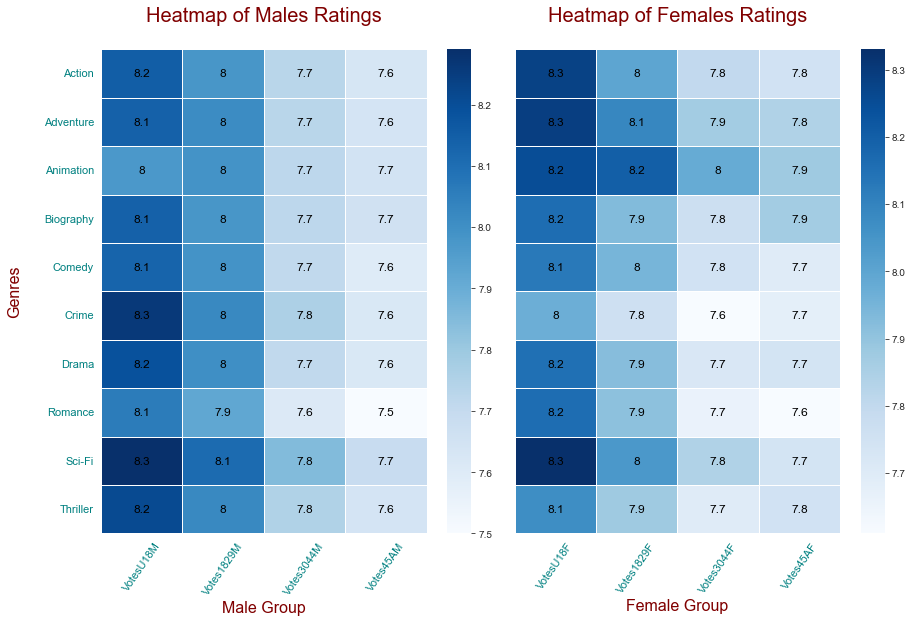

In [61]:
# 2nd set of heat maps for Votes-related columns

# Setting subplot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (13,9))

# Setting heatmap for Avg_Males_Votes
M_Votes = sns.heatmap(Avg_M_Votes, cmap = 'Blues', ax = ax1, annot = True, 
                      annot_kws = {'fontsize' : 12, 'fontweight' : 6, 'color' : 'Black'}, linewidths = 0.5)

# Setting title
M_Votes.set_title('Heatmap of Males Ratings\n', fontsize = 20, fontweight = 6, color = 'Maroon')

# Setting x and y axis lable
M_Votes.set_xlabel('Male Group\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
M_Votes.set_ylabel('Genres\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

# Setting x & y ticks
M_Votes.set_xticklabels(M_Votes.get_xticklabels(), rotation = 55, fontsize = 11, fontweight = 5, color = 'Teal')
M_Votes.set_yticklabels(M_Votes.get_yticklabels(), rotation = 0, fontsize = 11, fontweight = 5, color = 'Teal')

# Setting heatmap for Avg_Females_Votes
F_Votes = sns.heatmap(Avg_F_Votes, cmap = 'Blues', ax = ax2, annot = True, 
                      annot_kws = {'fontsize' : 12, 'fontweight' : 6, 'color' : 'Black'}, linewidths = 0.5)

# Setting title
F_Votes.set_title('Heatmap of Females Ratings\n', fontsize = 20, fontweight = 6, color = 'Maroon')

# Setting x and y axis lable
F_Votes.set_xlabel('Female Group\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
F_Votes.set_ylabel('')

# Setting x ticks
F_Votes.set_xticklabels(F_Votes.get_xticklabels(), rotation = 55, fontsize = 11, fontweight = 5, color = 'Teal')

plt.tight_layout()
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Audience from age groups of U18 and 18-29 irrespective of their gender are most likely to rate movies whereas audience from age groups of 30-44 and 45A are least likely to rate movies irrespective of their gender. Which shows the downward trend with the increasing age for both males & females.   
- Inference 2: Audience from age groups of U18 both males & females are most likely to rate movies higher for every genres in comparison of audience of all other age groups.
- Inference 3: Other than Crime & Sci-Fi are the most rated genre by male audience of all age groups. Action & Adventure are the most rated genre by female audience of all age groups. 

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [62]:
# Checking the values of 'Country' column of 'movies' dataframe 

movies.Country.value_counts()

USA          81
UK           11
Australia     3
France        3
Canada        1
Spain         1
Name: Country, dtype: int64

In [63]:
# Creating a new column 'IFUS' for 'movies' dataframe 

movies['IFUS'] = movies['Country'].apply(lambda x: 'USA' if x == 'USA' else 'Non-USA')
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Total_Facebook_Likes,IFUS
0,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50,138800.0,Non-USA
1,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.10,79000.0,USA
2,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.9,7.4,8.1,7.9,PG-13,USA,33.914986,7.70,76000.0,USA
3,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0,USA
4,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.8,8.4,8.4,PG-13,USA,198.130642,8.10,73000.0,USA


In [64]:
# Checking the values of new column 'IFUS' of 'movies' dataframe

movies.IFUS.value_counts()

USA        81
Non-USA    19
Name: IFUS, dtype: int64

In [65]:
# Checking the shape of 'movies' dataframe

movies.shape

(100, 66)

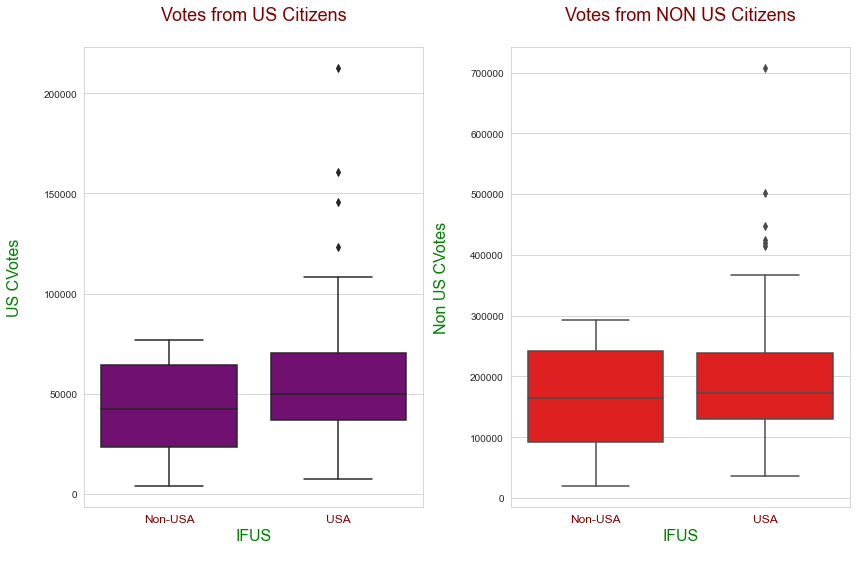

In [66]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

# Setting subplot 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

# Setting boxplot for US_votes
US_votes = sns.boxplot(data = movies, x = 'IFUS', y = 'CVotesUS', ax = ax[0], color = 'Purple')

# Setting title
US_votes.set_title('Votes from US Citizens\n', fontsize = 18, fontweight = 7, color = 'Maroon')

# Setting x and y axis lable & ticks for US_votes
US_votes.set_xlabel('IFUS\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
US_votes.set_ylabel('US CVotes\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
US_votes.set_xticklabels(US_votes.get_xticklabels(), rotation = 0, fontsize = 12, fontweight = 5, color = 'Maroon')

# Setting boxplot for Non_US_votes
Non_US_votes = sns.boxplot(data = movies, x = 'IFUS', y = 'CVotesnUS', ax = ax[1], color = 'Red')

# Setting title
Non_US_votes.set_title('Votes from NON US Citizens\n', fontsize = 18, fontweight = 7, color = 'Maroon')

# Setting x and y axis lable & ticks for Non_US_votes
Non_US_votes.set_xlabel('IFUS\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
Non_US_votes.set_ylabel('Non US CVotes\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
Non_US_votes.set_xticklabels(Non_US_votes.get_xticklabels(), rotation = 0, fontsize = 12, fontweight = 5, color = 'Maroon')


plt.tight_layout()
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: There are some outliers for movies from USA in both boxplot and showing that both US and NON US citizens voted highly for some selective movies. Non USA movies seem to be well distributed in both boxplot.
- Inference 2: Non USA movies got lesser votes from both US and NON US citizens. And overall No. of votes from Non US citizens are far higher in numbers in comparison to No. of votes from US citizens.

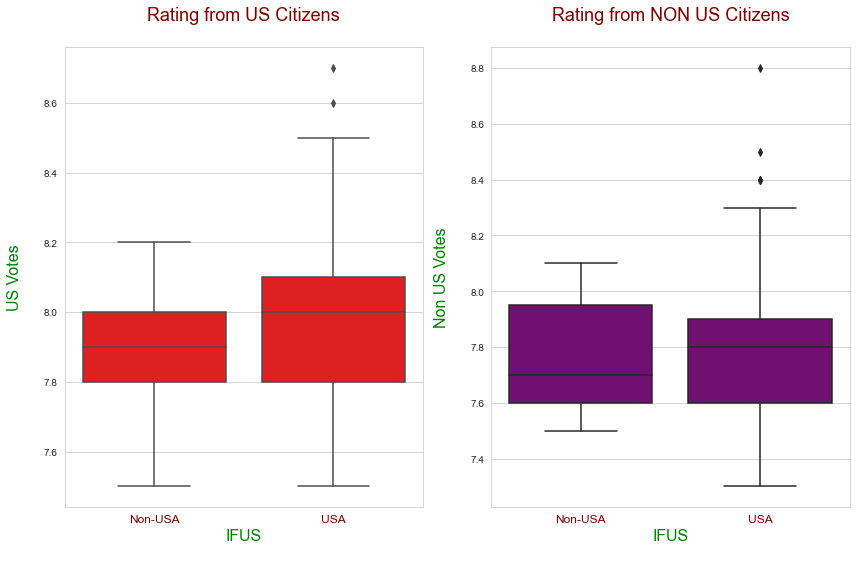

In [67]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

# Setting subplot 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

# Setting boxplot for US_votes
US_rating = sns.boxplot(data = movies, x = 'IFUS', y = 'VotesUS', ax = ax[0], color = 'Red')

# Setting title
US_rating.set_title('Rating from US Citizens\n', fontsize = 18, fontweight = 7, color = 'Maroon')

# Setting x and y axis lable & ticks for US_votes
US_rating.set_xlabel('IFUS\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
US_rating.set_ylabel('US Votes\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
US_rating.set_xticklabels(US_rating.get_xticklabels(), rotation = 0, fontsize = 12, fontweight = 5, color = 'Maroon')

# Setting boxplot for Non_US_votes
Non_US_rating = sns.boxplot(data = movies, x = 'IFUS', y = 'VotesnUS', ax = ax[1], color = 'Purple')

# Setting title
Non_US_rating.set_title('Rating from NON US Citizens\n', fontsize = 18, fontweight = 7, color = 'Maroon')

# Setting x and y axis lable & ticks for Non_US_votes
Non_US_rating.set_xlabel('IFUS\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
Non_US_rating.set_ylabel('Non US Votes\n', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
Non_US_rating.set_xticklabels(Non_US_rating.get_xticklabels(), rotation = 0, fontsize = 12, fontweight = 5, color = 'Maroon')


plt.tight_layout()
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: Average of rating by both US and NON US citezins is higher for USA movies. There are some outliers for movies from USA in both boxplot. 
- Inference 2: US citizens have rated NON USA movies higher than NON US citizens and also overall rating by US citizen for the both USA and NON USA movies is higher in coparison of NON US citizens. 

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [68]:
# Sorting the values of dataframe 'genre_top10' by 'CVotes1000'

genre_top10.sort_values(by = 'CVotes1000', ascending = False, inplace = True)
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Genre,,,,,,,,,,,,,,,,,,,,,
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


In [69]:
# Selecting only those columns which shows required information for better understanding

genre_top10[['CVotes1000', 'cnt']]

,CVotes1000,cnt
Genre,,
Sci-Fi,714,17.0
Action,681,31.0
Thriller,669,13.0
Adventure,662,38.0
Crime,620,11.0
Comedy,605,23.0
Biography,600,18.0
Drama,585,65.0
Animation,578,11.0


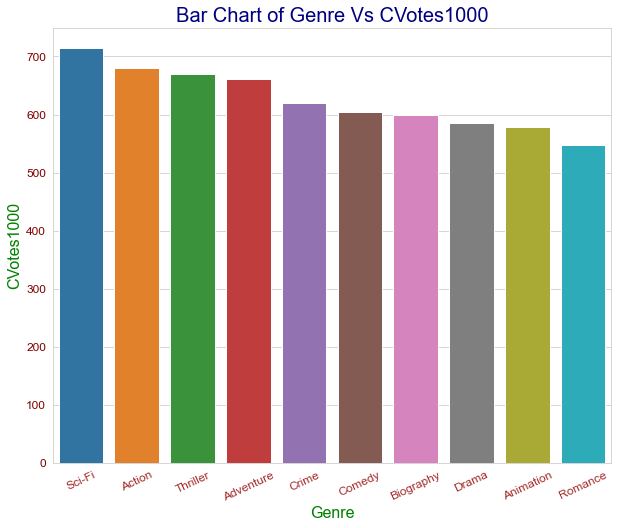

In [70]:
# Bar plot

plt.figure(figsize = [10,8])

genre_Vs_CVotes1000 = sns.barplot(x = genre_top10.index, y = genre_top10.CVotes1000)

# Setting title
plt.title('Bar Chart of Genre Vs CVotes1000', fontsize = 20, fontweight = 7, color = 'Navy')

#S etting lable for x axis and y axis
genre_Vs_CVotes1000.set_xlabel("Genre", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})
genre_Vs_CVotes1000.set_ylabel("CVotes1000", fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Green'})

# Setting x & y ticks
plt.xticks(rotation = 25, fontsize = 12, fontweight = 5, color = 'Brown')
plt.yticks(rotation = 0, fontsize = 12, fontweight = 5, color = 'Maroon')

plt.show()

**`Inferences:`** Write your inferences/observations here.
- Among the Top 1000 voters Sci-Fi has highest number votes it is the most popular genre while Romance has the lowest number of votes it is the least popular genre.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.